In [1]:
%pylab nbagg
%load_ext autoreload
%autoreload 2
import mpl_interactions as pli

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
# Test the fastcat mhd file reader from fastcat.utils
import fastcat as fc
import numpy as np
import matplotlib.pyplot as plt
import fastcat.ggems_scatter as gg_scatter


# Read the mhd file from data
mhd_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604.mhd'
range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
material_file = '/home/jericho/1-Workspace/fastcat_gate/Materials.txt'
spectrum_file = '/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/data/spectrum_120kVp_2mmAl.dat'

Catphan604_phantom = fc.utils.get_phantom_from_mhd(mhd_file,range_file,material_file)
# import mpl_interactions as pli
s = fc.Spectrum()
s.load(spectrum_file=spectrum_file)
det = fc.Detector(s,'CsI-784-micrometer')
angles = np.linspace(0,np.pi*2,10,endpoint=False)        

[2023-11-13 10:52:29,806] {utils.py:231} INFO - Loading density data from file
[2023-11-13 10:52:29,810] {utils.py:321} INFO -     Saved Air atten to file in data/mu/Air.csv
[2023-11-13 10:52:29,811] {utils.py:321} INFO -     Saved polyurethane atten to file in data/mu/polyurethane.csv
[2023-11-13 10:52:29,812] {utils.py:321} INFO -     Saved teflon atten to file in data/mu/teflon.csv
[2023-11-13 10:52:29,813] {utils.py:321} INFO -     Saved pmp atten to file in data/mu/pmp.csv
[2023-11-13 10:52:29,814] {utils.py:321} INFO -     Saved bone50 atten to file in data/mu/bone50.csv
[2023-11-13 10:52:29,815] {utils.py:321} INFO -     Saved ldpe atten to file in data/mu/ldpe.csv
[2023-11-13 10:52:29,816] {utils.py:321} INFO -     Saved polystyrene atten to file in data/mu/polystyrene.csv
[2023-11-13 10:52:29,816] {utils.py:321} INFO -     Saved acrylic atten to file in data/mu/acrylic.csv
[2023-11-13 10:52:29,818] {utils.py:321} INFO -     Saved bone20 atten to file in data/mu/bone20.csv
[202

In [8]:
Catphan604_phantom.return_projs(det,s,angles, 
                                mgy=0, ASG=False,scat_on=False,
                                det_on=False,bowtie=False,
                                filter='bowtie_real',return_intensity=True)

[2023-11-13 10:52:30,341] {simulate.py:221} INFO - Initializing filter bowtie_real
[2023-11-13 10:52:30,355] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-13 10:52:30,356] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-13 10:52:31,109] {simulate.py:579} INFO - Running Simulations
[2023-11-13 10:52:31,110] {simulate.py:606} INFO -     Simulating 10 keV
[2023-11-13 10:52:31,749] {simulate.py:606} INFO -     Simulating 20 keV
[2023-11-13 10:52:32,370] {simulate.py:606} INFO -     Simulating 30 keV
[2023-11-13 10:52:33,014] {simulate.py:606} INFO -     Simulating 40 keV
[2023-11-13 10:52:33,636] {simulate.py:606} INFO -     Simulating 50 keV
[2023-11-13 10:52:34,254] {simulate.py:606} INFO -     Simulating 60 keV
[2023-11-13 10:52:34,878] {simulate.py:606} INFO -     Simulating 70 keV
[2023-11-13 10:52:35,500] {simulate.py:606} INFO -     Simulating 80 keV
[2023-11-13 10:52:36,123] {simulate.py:606} INFO -     Simulating 90 keV
[2023-11-13 1

In [9]:
import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    '''
    :param filename: path to the .mhd file
    Returns: ct_scan, origin, spacing
    '''
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage).squeeze()

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

<IPython.core.display.Javascript object>


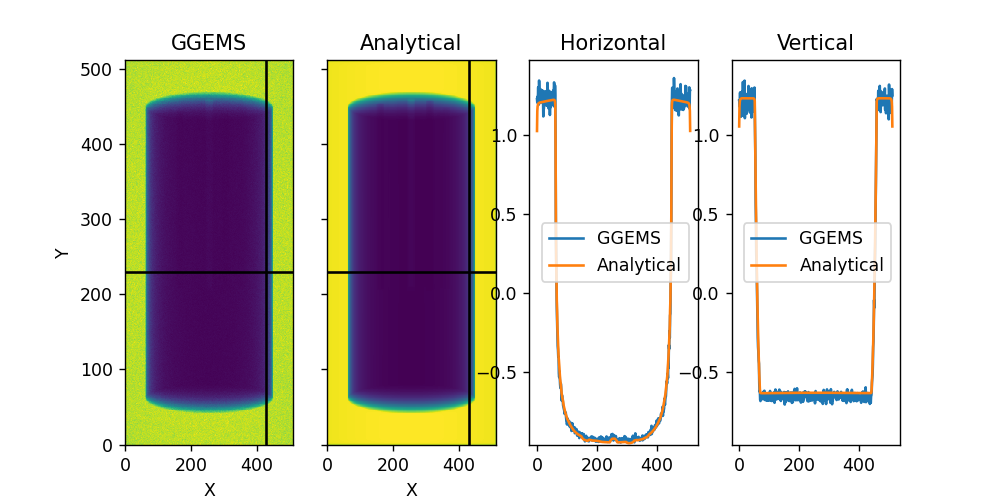

<IPython.core.display.Javascript object>


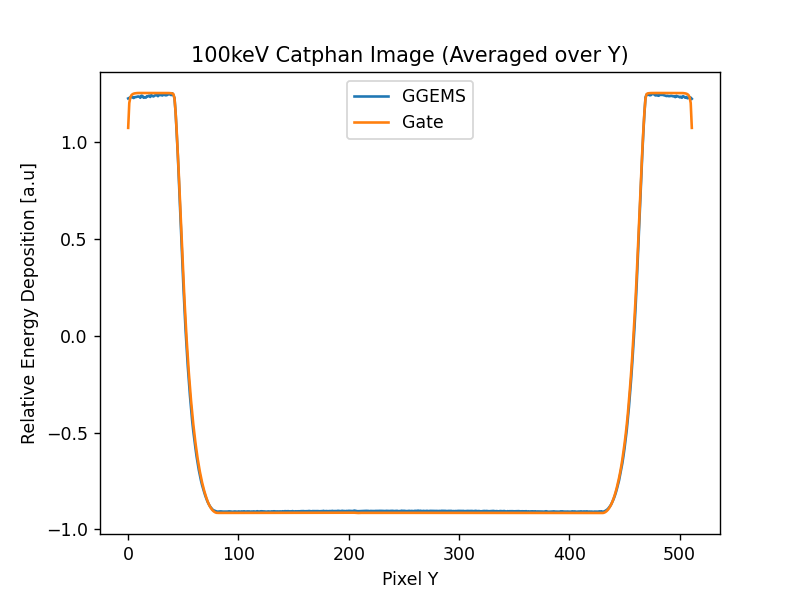

<IPython.core.display.Javascript object>


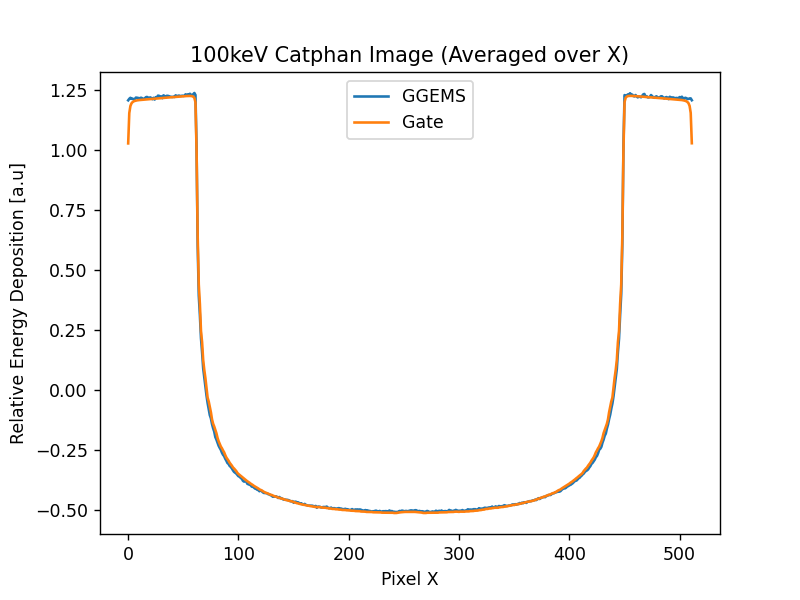

In [12]:
fastcat_norm = (Catphan604_phantom.intensity[0] - np.mean(Catphan604_phantom.intensity[0]))/np.std(Catphan604_phantom.intensity[0])
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_120kVp_1e10_hit.mhd') # What is this in? - Should be MeV as well according to didier
# scatter_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_')

ggems_image2 = ggems_image # - scatter_image
ggems_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(fastcat_norm,0)],figsize=[8,4],heatmap_names=['GGEMS','Analytical'],slices='both')

plt.figure()
plt.title('100keV Catphan Image (Averaged over Y)')
plt.plot(np.mean(ggems_norm[:,100:-100],axis=1))
plt.plot(np.mean(np.rot90(fastcat_norm,0)[:,100:-100],axis=1))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel Y')
plt.legend(['GGEMS','Gate'])

plt.figure()
plt.title('100keV Catphan Image (Averaged over X)')
plt.plot(np.mean(ggems_norm[:-250,:],axis=0))
plt.plot(np.mean(np.rot90(fastcat_norm,0)[:-250,:],axis=0))
plt.ylabel('Relative Energy Deposition [a.u]')
plt.xlabel('Pixel X')

plt.legend(['GGEMS','Gate'])

<IPython.core.display.Javascript object>


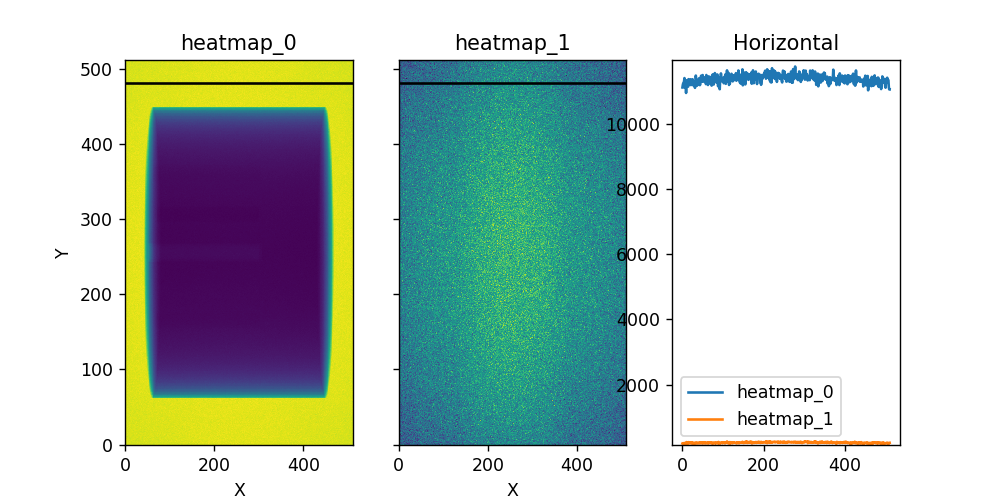

(<Figure size 800x400 with 3 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'heatmap_1'}, xlabel='X'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [54]:
pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_image[0],scatter_image[0]],figsize=[8,4])

In [22]:
from fastcat.utils import read_range_file

In [41]:
read_range_file2(range_file)

(array(['Air', 'polyurethane', 'teflon', 'pmp', 'bone50', 'ldpe',
        'polystyrene', 'acrylic', 'bone20', 'pom'], dtype='<U12'),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [40]:
def read_range_file2(filename):
    """Reads a range file and returns a list of ranges"""
    materials = []
    low_range = []
    high_range = []
    with open(filename) as f:
        for line in f:
            words = line.split()
#             print(len(words))
            if len(words) == 3:
                materials.append(words[2])
                low_range.append(float(words[0]))
                high_range.append(float(words[1]))

    return np.array(materials), np.array(low_range), np.array(high_range)

In [39]:
'this has '.split()

['this', 'has']

<IPython.core.display.Javascript object>


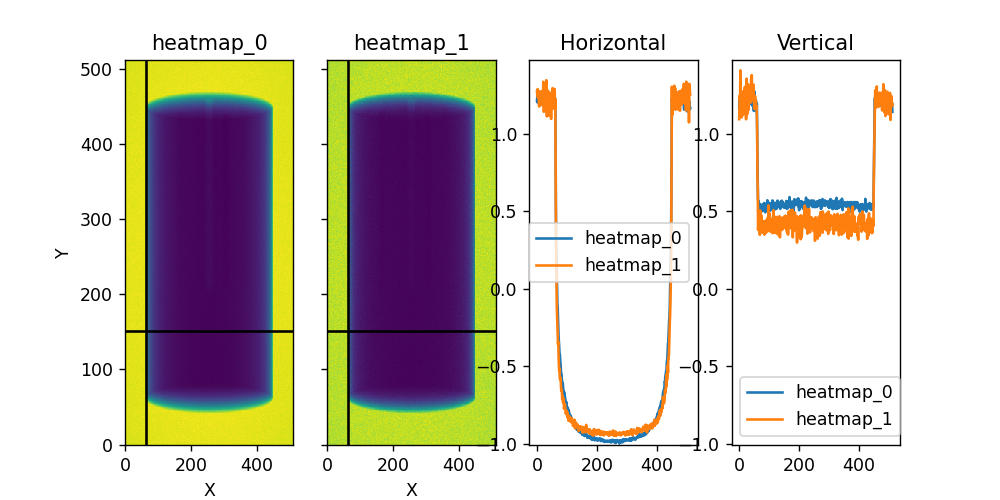

[2023-11-13 10:25:43,757] {font_manager.py:1411} DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2023-11-13 10:25:43,758] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,758] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,759] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts

[2023-11-13 10:25:43,764] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,764] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2023-11-13 10:25:43,765] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,765] {font_manager.py:1

[2023-11-13 10:25:43,770] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Light.ttf', name='Yrsa', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
[2023-11-13 10:25:43,770] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Bold.otf', name='C059', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,771] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Kinnari-Italic.ttf', name='Kinnari', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2023-11-13 10:25:43,771] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=700, stretch='normal', size=

[2023-11-13 10:25:43,783] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypist-Bold.ttf', name='Tlwg Typist', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,783] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf', name='Ubuntu Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,783] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lohit-punjabi/Lohit-Gurmukhi.ttf', name='Lohit Gurmukhi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,784] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-BoldOblique.ttf', name='Umpush', style='oblique', variant='normal', weight=700, stretch='normal', size

[2023-11-13 10:25:43,795] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,795] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-telu-extra/Pothana2000.ttf', name='Pothana2000', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,795] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2023-11-13 10:25:43,795] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-Bold.ttf', name='Umpush', style='normal', variant='normal', weight=700, stretch='no

[2023-11-13 10:25:43,800] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak/Samyak-Devanagari.ttf', name='Samyak Devanagari', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
[2023-11-13 10:25:43,801] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSerif-BoldItalic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
[2023-11-13 10:25:43,801] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-Light.ttf', name='Umpush', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
[2023-11-13 10:25:43,801] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Medium.ttf', name='Rasa', style='normal', variant='normal', weight=500, stre

[2023-11-13 10:25:43,807] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,807] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Karumbi-Regular.ttf', name='Karumbi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,807] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf', name='Ubuntu', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2023-11-13 10:25:43,808] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgMono-Bold.ttf', name='Tlwg Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable

[2023-11-13 10:25:43,818] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationMono-Italic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2023-11-13 10:25:43,818] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/fonts/Inconsolata-Regular.ttf', name='Inconsolata', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,818] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/P052-BoldItalic.otf', name='P052', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
[2023-11-13 10:25:43,818] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lohit-malayalam/Lohit-Malayalam.ttf', name='Lohit Malayalam', style='normal', variant='normal', weight=40

[2023-11-13 10:25:43,828] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Gayathri-Bold.otf', name='Gayathri', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,828] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/SreeKrushnadevaraya.ttf', name='Sree Krushnadevaraya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,828] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/Gurajada.ttf', name='Gurajada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,829] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-BoldItalic.otf', name='Nimbus Mono PS', style='italic', variant='normal', weigh

[2023-11-13 10:25:43,834] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,834] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Gubbi/Gubbi.ttf', name='Gubbi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,834] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansMono-Bold.ttf', name='Noto Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[2023-11-13 10:25:43,834] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Manjari-Regular.otf', name='Manjari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'

[2023-11-13 10:25:43,927] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak-fonts/Samyak-Gujarati.ttf', name='Samyak Gujarati', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
[2023-11-13 10:25:43,927] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf', name='Meera', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,927] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst-one/KacstOne.ttf', name='KacstOne', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,927] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/home/jericho/anaconda3/fonts/Ubuntu-R.ttf', name='Ubuntu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10

[2023-11-13 10:25:43,932] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf', name='Sawasdee', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
[2023-11-13 10:25:43,933] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Bold.otf', name='Nimbus Sans Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
[2023-11-13 10:25:43,933] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/sinhala/lklug.ttf', name='LKLUG', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2023-11-13 10:25:43,933] {font_manager.py:1423} DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Oblique.otf', name='Nimbus Sans Narrow', style='oblique', variant='normal', weight=

(<Figure size 800x400 with 4 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'heatmap_1'}, xlabel='X'>,
        <Axes: title={'center': 'Horizontal'}>,
        <Axes: title={'center': 'Vertical'}>], dtype=object))

In [6]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_edep_1e10_hit.mhd') # What is this in? - Should be MeV as well according to didier

ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_120kVp_1e10_hit.mhd')

# ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4],slices='both')

# print(np.mean((ggems_norm - np.rot90(fastcat_norm,3))**2))

<IPython.core.display.Javascript object>


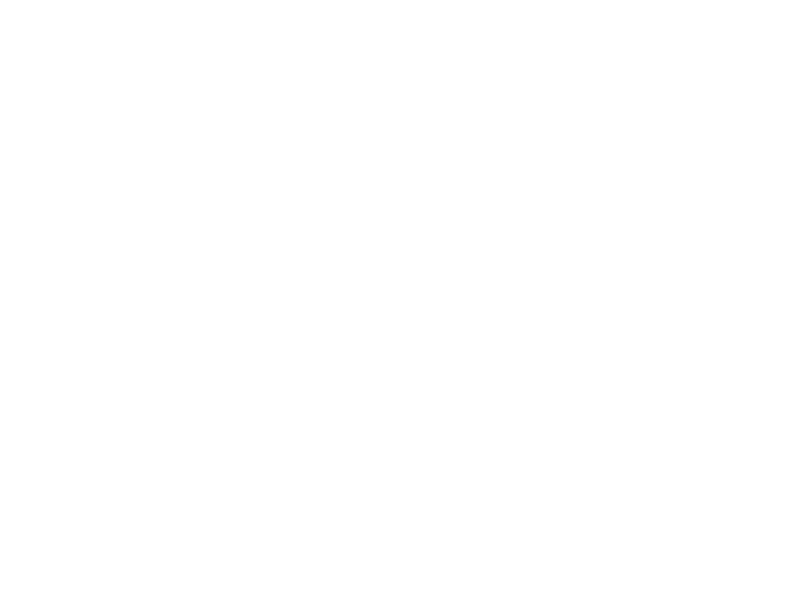

<IPython.core.display.Javascript object>


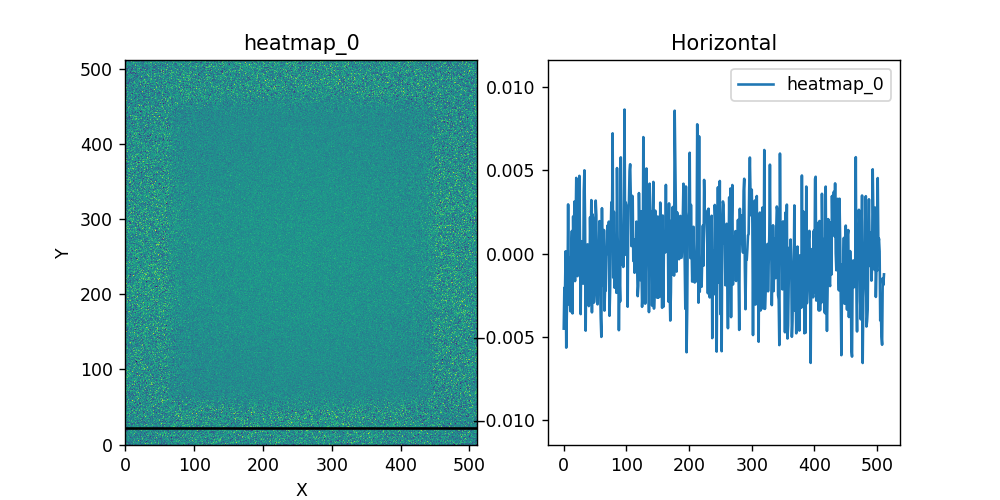

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [91]:
# plt.figure()
pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [(ggems_norm - np.rot90(ggems_edep_norm,0))/np.max(ggems_norm)],figsize=[8,4])

<IPython.core.display.Javascript object>


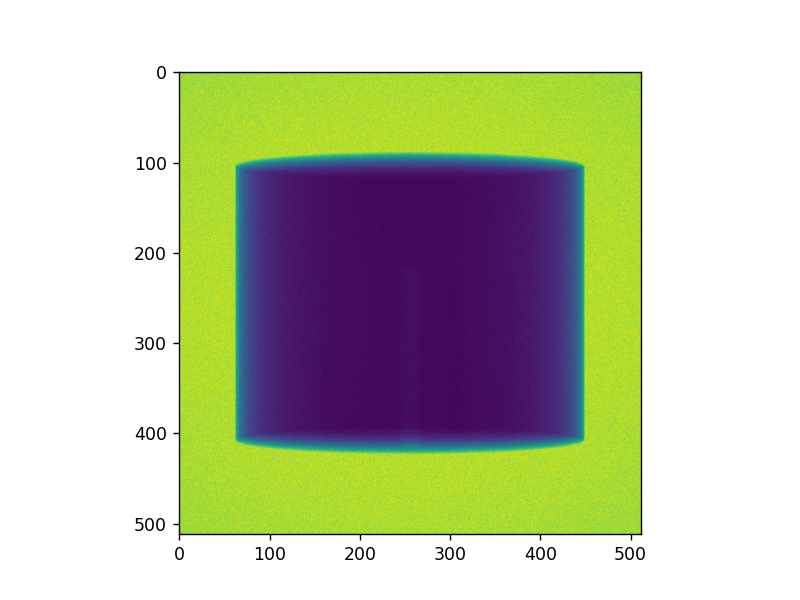

In [58]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/run_edep_hit.mhd') # What is this in? - Should be MeV as well according to didier

plt.figure()
plt.imshow(ggems_image)

In [92]:
import spekpy as sp

In [99]:
spec = np.loadtxt('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/data/spectrum_120kVp_2mmAl.dat')

<IPython.core.display.Javascript object>


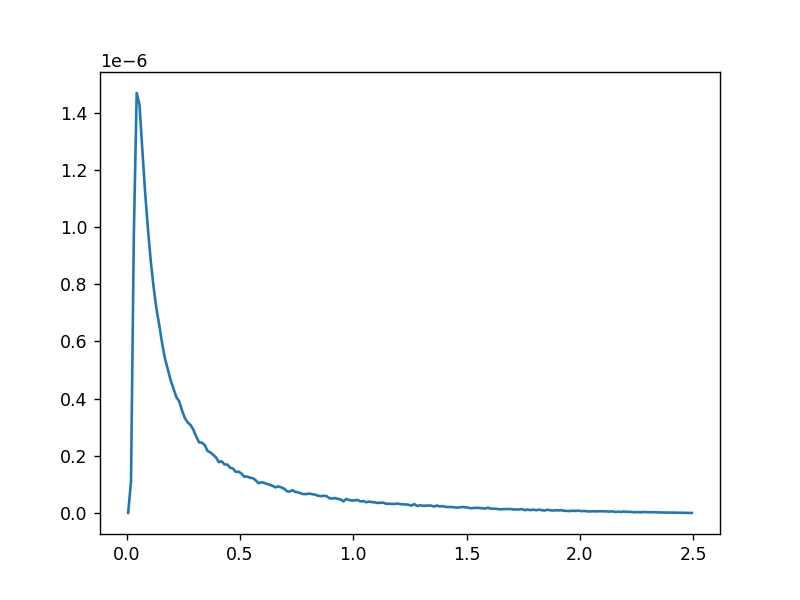

In [103]:
plt.figure()
plt.plot(spec[:,0],spec[:,1])

In [102]:
spec = np.loadtxt('/home/jericho/Software/fastcat/fastcat/data/MV_spectra/Al_spectrum_25.txt')

In [19]:
print(Catphan604_phantom.geomet)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1510 mm
Distance from source to origin (DSO)= 1000.0 mm
-----
Detector parameters
Number of pixels (nDetector) = [512 512]
Size of each pixel (dDetector) = [0.784 0.784] mm
Total size of the detector (sDetector) = [401.408 401.408] mm
-----
Image parameters
Number of voxels (nVoxel) = [400 526 526]
Total size of the image (sVoxel) = [200. 263. 263.] mm
Size of each voxel (dVoxel) = [0.5 0.5 0.5] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


In [20]:
Catphan604_phantom.phan_map

array(['Air', 'polyurethane', 'teflon', 'pmp', 'bone50', 'ldpe',
       'polystyrene', 'acrylic', 'bone20', 'pom'], dtype='<U12')